In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
all_data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
all_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
all_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


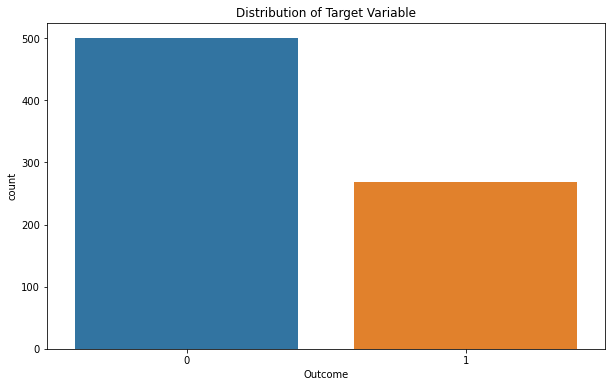

In [4]:
plt.figure(figsize = (10,6))
sns.countplot('Outcome',data=all_data).set_title('Distribution of Target Variable')
plt.show()

The Outcome coumn has a lot of '0 Outcomes'.The target variable(Outcome) has an imbalanced distribution of independent variables. This might influence the performance of our model negatively.

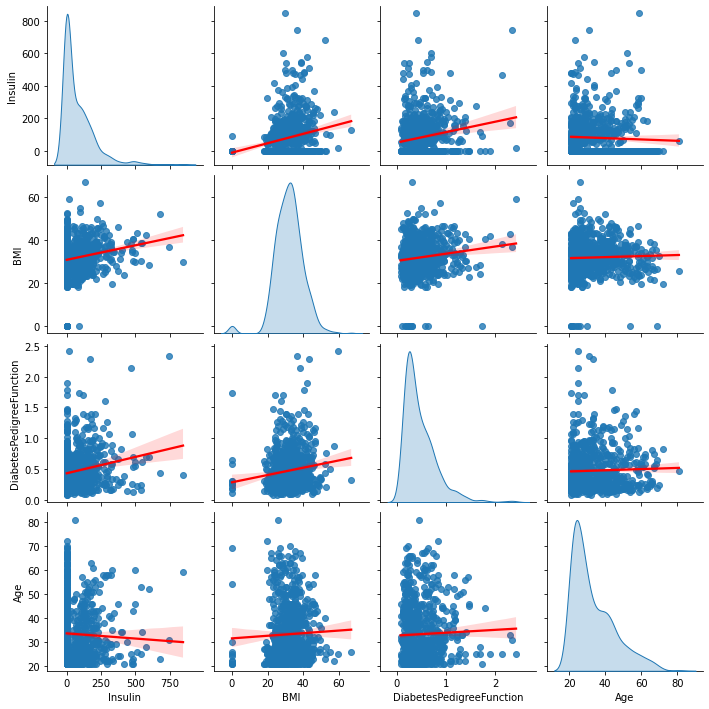

In [5]:
sns.pairplot(all_data[['Insulin','BMI','DiabetesPedigreeFunction', 'Age']],diag_kind='kde',kind='reg',plot_kws={'line_kws':{'color':'red'}})

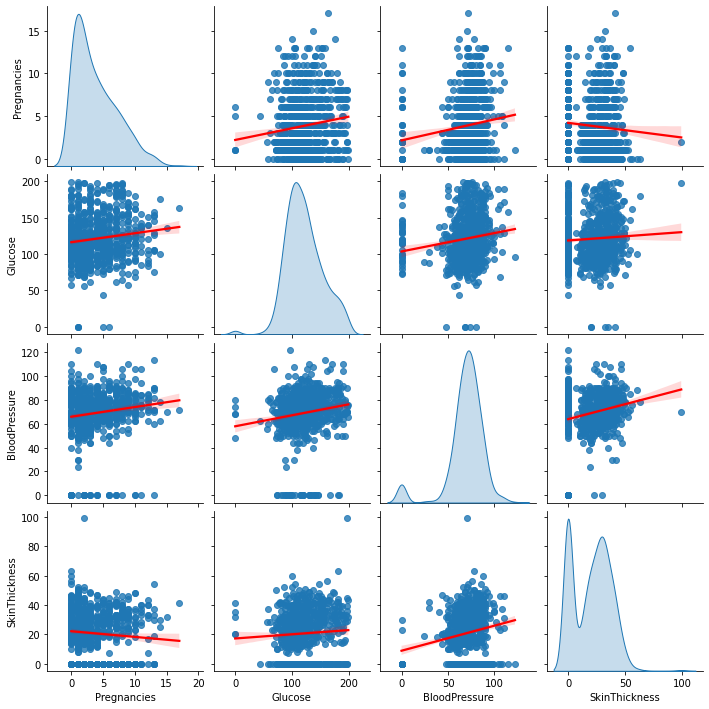

In [6]:
sns.pairplot(all_data[['Pregnancies','Glucose','BloodPressure', 'SkinThickness']],diag_kind='kde',kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [7]:
# Examining the missing values 
features = np.array(all_data.columns[0:-1])
features

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [8]:
# getting an idea about the values in each of the features
for feature in features:
    print(all_data[feature].describe())
    print('\n')

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64


count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64


count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64


count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64


count    768.000000
mean

The columns Glucose, BloodPressure, SkinThickness, Insulin, BMI have some 0 values which might have a negative impact on our model and might skew the results. We can impute those values with the mean or median.

In [9]:
X = all_data[features]
scaler = StandardScaler()
columns = np.array(all_data.keys())

scaledX = scaler.fit_transform(X)
all_data[features] = scaledX
all_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


In [10]:
X = all_data[features]
y = all_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [11]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
accuracy_score(y_pred,y_test)

0.7705627705627706

In [14]:
confusion_matrix(y_test, y_pred)

array([[134,  23],
       [ 30,  44]])

In [15]:
# finding the optimal value of k using grid search cross validation 

param_grid = {'n_neighbors':np.arange(1,40)}

knn= GridSearchCV(classifier,param_grid,cv=5,scoring='roc_auc',n_jobs=-1,pre_dispatch='2*n_jobs')
knn.fit(X_train,y_train)
knn.best_params_


{'n_neighbors': 38}

In [16]:
optimal_classifier = KNeighborsClassifier(n_neighbors=38, metric='minkowski',p=2)
optimal_classifier.fit(X_train, y_train)
y_pred_ = optimal_classifier.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred_)

0.7575757575757576

Comparision with the Logistic Regression model 

**PRECISION**
